<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [442]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a dataframe.


In [443]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [444]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [445]:
df["ConvertedComp"].head()

0     61000.0
1     95179.0
2     90000.0
3    455352.0
4     65277.0
Name: ConvertedComp, dtype: float64

<AxesSubplot:ylabel='Density'>

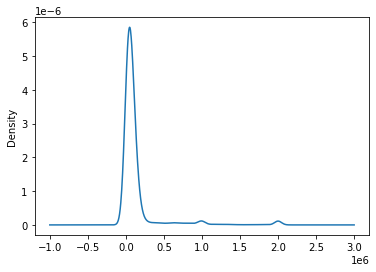

In [446]:
# your code goes here
df["ConvertedComp"].plot.kde()

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

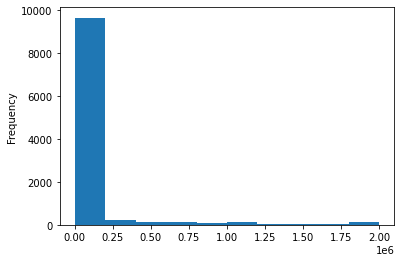

In [447]:
# your code goes here
df["ConvertedComp"].plot.hist()

What is the median of the column `ConvertedComp`?


In [448]:
# your code goes here
df["ConvertedComp"].median()

57745.0

In [449]:
df["ConvertedComp"].mean()

131596.7316197316

How many responders identified themselves only as a **Man**?


In [450]:
# your code goes here
df["Gender"].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [451]:
len(df[df["Gender"]=='Man'])

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [452]:
# your code goes here
df[df["Gender"]=='Woman']["ConvertedComp"].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [453]:
# your code goes here
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [454]:
df["Age"].median()

29.0

Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

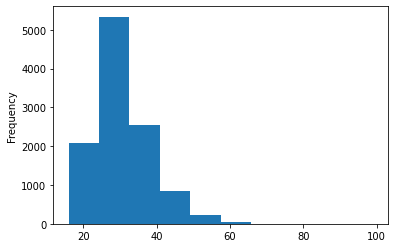

In [455]:
# your code goes here
df["Age"].plot.hist()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


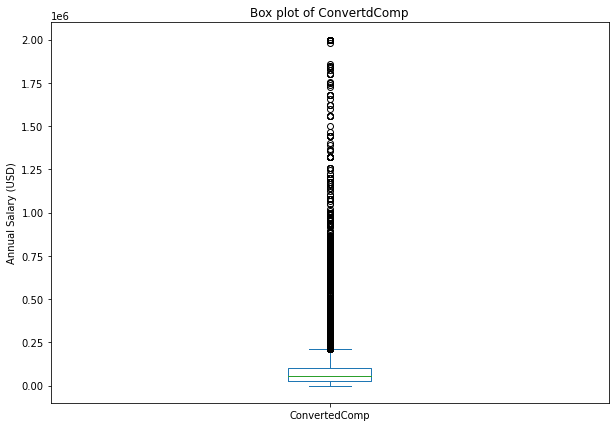

In [456]:
# your code goes here
df["ConvertedComp"].plot(kind='box', figsize=(10, 7))

plt.title('Box plot of ConvertdComp')
plt.ylabel('Annual Salary (USD)')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [457]:
df['ConvertedComp']

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

In [458]:
#Use it if you want to replace Nan values  with median value
#missing_data = df.isnull()
#missing_data['ConvertedComp'].value_counts()
#median_convertedcomp= df['ConvertedComp'].median(axis=0)
#df['ConvertedComp'].replace(np.nan, median_convertedcomp, inplace=True)
#missing_data = df.isnull()
#missing_data['ConvertedComp'].value_counts()


In [459]:
len(df['ConvertedComp'])

11398

In [460]:
#drop rows with Nan values in column ConvertedComp
df2=df.dropna(subset=['ConvertedComp'])

In [461]:
df3=df2['ConvertedComp']

In [462]:
len(df3)

10582

In [463]:
# your code goes here
q1 = np.quantile(df3, 0.25)
q3 = np.quantile(df3, 0.75)

In [464]:
# finding the iqr region (Inter Quartile Range)
iqr = q3-q1
iqr

73132.0

Find out the upper and lower bounds.


In [465]:
# your code goes here
upper_bound = q3+(1.5*iqr)
upper_bound

209698.0

In [466]:
lower_bound = q1-(1.5*iqr)
lower_bound

-82830.0

Identify how many outliers are there in the `ConvertedComp` column.


In [467]:
# your code goes here
outliers = df3[(df3 <= lower_bound) | (df3 >= upper_bound)]
num_outliers=len(outliers)
print('There are ', num_outliers, ' outliers in the ConvertedComp column')

There are  879  outliers in the ConvertedComp column


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [468]:
# your code goes here
new_ConvertedComp= df3[(df3 >= lower_bound) & (df3 <= upper_bound)]

In [469]:
new_ConvertedComp

0         61000.0
1         95179.0
2         90000.0
4         65277.0
5         31140.0
           ...   
11392      9600.0
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
Name: ConvertedComp, Length: 9703, dtype: float64

In [470]:
df['New_ConvertedComp']=new_ConvertedComp

In [471]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,New_ConvertedComp
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,95179.0
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,90000.0
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,NaN
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,65277.0


What is the median ConvertedComp after removing outliers?

In [472]:
df["New_ConvertedComp"].median()

52704.0

What is the mean ConvertedComp after removing outliers?

In [473]:
df["New_ConvertedComp"].mean()

59883.20838915799

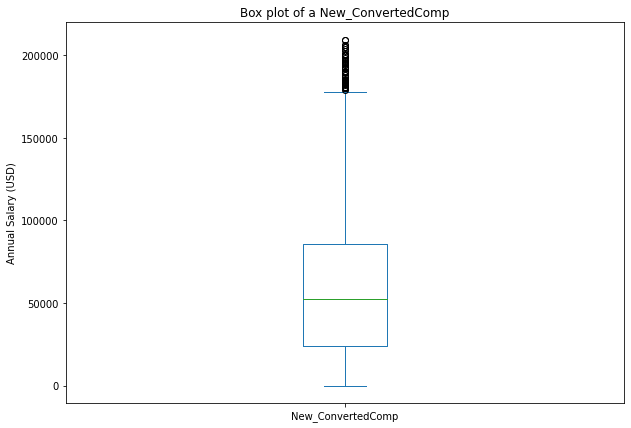

In [474]:
df["New_ConvertedComp"].plot(kind='box', figsize=(10, 7))

plt.title('Box plot of a New_ConvertedComp')
plt.ylabel('Annual Salary (USD)')

plt.show()

Based on the boxplot of ‘Age’ how many outliers do you see below Q1?

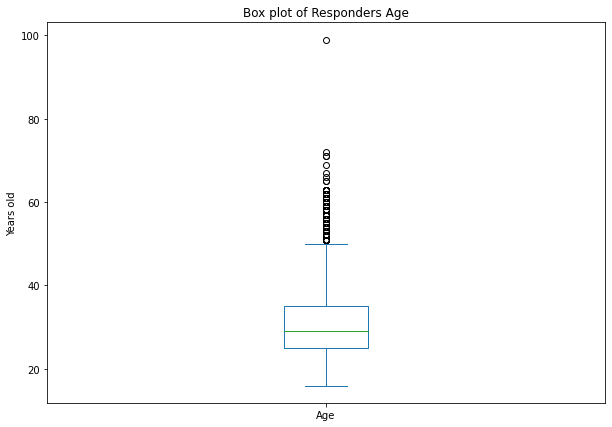

In [475]:
df["Age"].plot(kind='box', figsize=(10, 7))

plt.title('Box plot of Responders Age')
plt.ylabel('Years old')

plt.show()

## Correlation


In [476]:
df.dtypes

Respondent             int64
MainBranch            object
Hobbyist              object
OpenSourcer           object
OpenSource            object
                      ...   
Ethnicity             object
Dependents            object
SurveyLength          object
SurveyEase            object
New_ConvertedComp    float64
Length: 86, dtype: object

### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [477]:
#Find numerical columns
numerics = ['int16', 'int32', 'int64','float64']
numerical_columns = df.select_dtypes(include=numerics)

In [478]:
numerical_columns.head()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,New_ConvertedComp
0,4,61000.0,61000.0,80.0,NaN,22.0,61000.0
1,9,138000.0,95179.0,32.0,12.0,23.0,95179.0
2,13,90000.0,90000.0,40.0,5.0,28.0,90000.0
3,16,29000.0,455352.0,40.0,NaN,26.0,NaN
4,17,90000.0,65277.0,45.0,5.0,29.0,65277.0


In [479]:
# your code goes here
numerical_columns.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,New_ConvertedComp
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041,0.010878
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970,-0.063561
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386,1.000000
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518,0.034351
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469,-0.088934
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000,0.401821
New_ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821,1.000000


In [480]:
age_correlation=numerical_columns.corr()
age_correlation['Age']

Respondent           0.004041
CompTotal            0.006970
ConvertedComp        0.105386
WorkWeekHrs          0.036518
CodeRevHrs          -0.020469
Age                  1.000000
New_ConvertedComp    0.401821
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
